### [Exploring the Tree Structure](https://pmorissette.github.io/bt/examples.html#:~:text=average%20crossover%20strategy.-,Exploring%20the%20Tree%20Structure,-So%20far%2C%20we)
- what if we wanted to test a strategy that allocated capital to sub-strategies?



In [1]:
import warnings

import bt
import pandas as pd
from bt.algos import (
    Rebalance,
    RunMonthly,
    SelectAll,
    WeighEqually,
    WeighInvVol,
    WeighTarget,
)
from bt.backtest import Backtest, Result
from bt.core import Algo, Strategy

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
def ma_cross(
    ticker, start="2010-01-01", short_ma=50, long_ma=200, name="ma_cross"
) -> Backtest:

    data: pd.DataFrame = bt.get(ticker, start=start)
    short_sma = data.rolling(short_ma).mean()
    long_sma = data.rolling(long_ma).mean()

    target_weight = long_sma.copy()
    target_weight[short_sma > long_sma] = 1.0
    target_weight[short_sma <= long_sma] = -1.0
    target_weight[long_sma.isnull()] = 0.0

    strategy = Strategy(name, [WeighTarget(target_weight), Rebalance()], [ticker])
    return Backtest(strategy, data)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'Equity Progression'}>

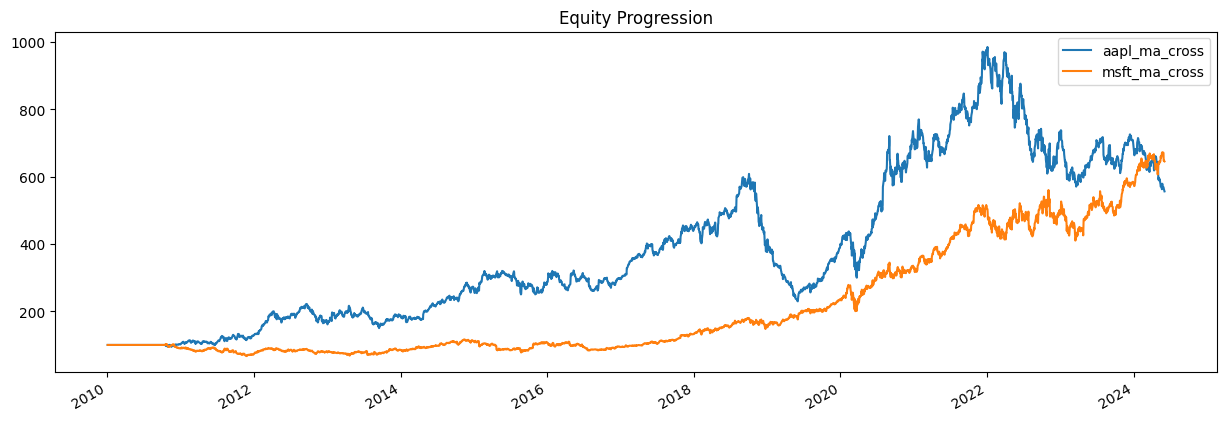

In [3]:
backtest1 = ma_cross("aapl", name="aapl_ma_cross")
backtest2 = ma_cross("msft", name="msft_ma_cross")
result: Result = bt.run(backtest1, backtest2)
result.plot()

<Axes: title={'center': 'Equity Progression'}>

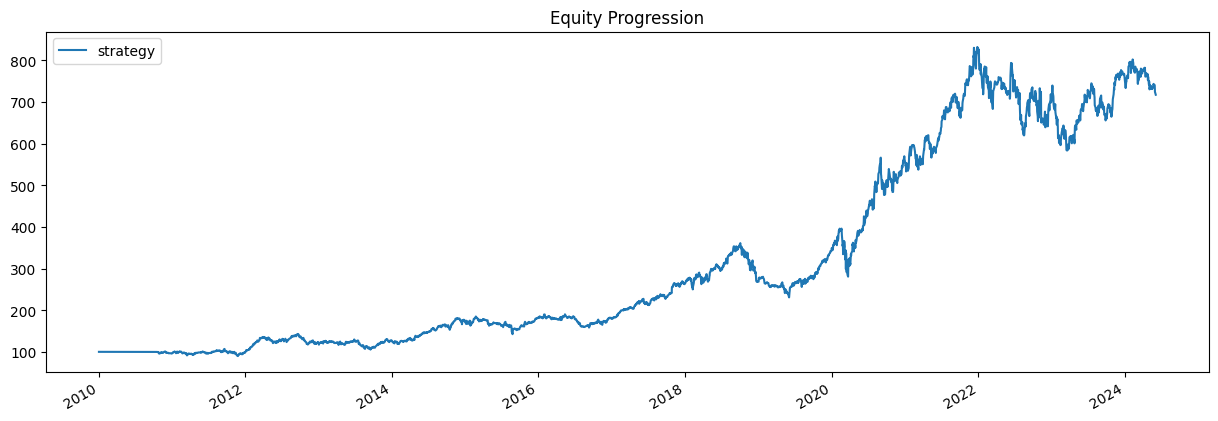

In [4]:
data = bt.merge(result["aapl_ma_cross"].prices, result["msft_ma_cross"].prices)

strategy = Strategy("strategy", algos=[SelectAll(), WeighInvVol(), Rebalance()])

backtest = Backtest(strategy, data)
result = bt.run(backtest)

result.plot()

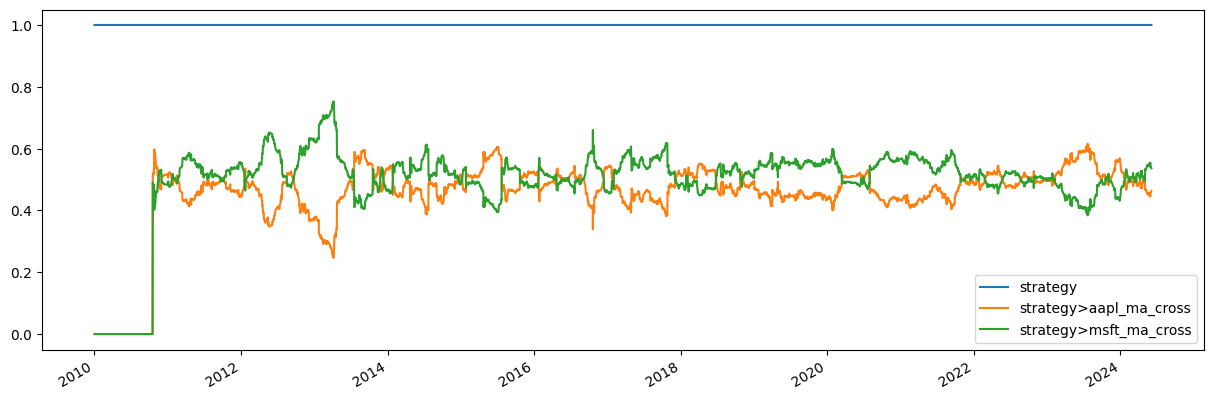

In [5]:
result.plot_weights()

위처럼 전략의 전략을 다루는 것을 아래 처럼 한번에 할 수 있다. ( 같은 코드 )

In [6]:
backtest1:Backtest = ma_cross("aapl", name="aapl_ma_cross")
backtest2:Backtest = ma_cross("msft", name="msft_ma_cross")

data = bt.merge(backtest1.data, backtest2.data)

data.dropna(inplace=True)

<Axes: title={'center': 'Equity Progression'}>

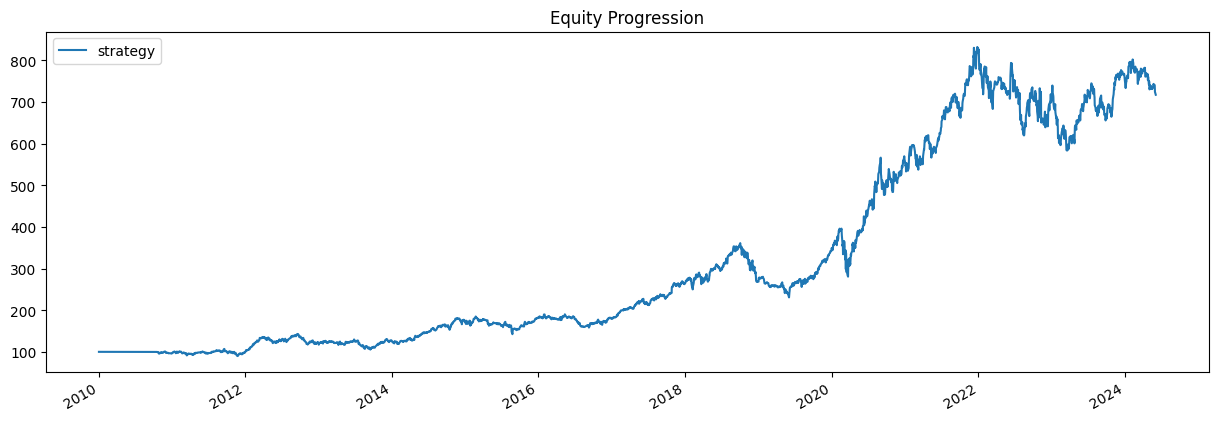

In [7]:
# 부모 전략
strategy = Strategy(
    "strategy",
    algos=[SelectAll(), WeighInvVol(), Rebalance()],
    children=[backtest1.strategy, backtest2.strategy],
)

backtest = Backtest(strategy, data)

result:Result = bt.run(backtest)

result.plot()

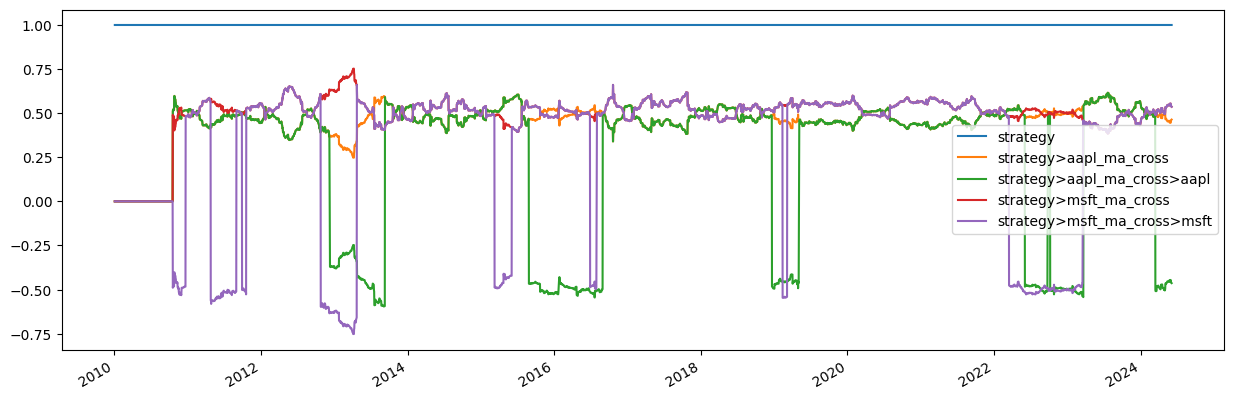

In [8]:
result.plot_weights()